In [300]:
import math
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [301]:
SAMPLE_MIN = 0
SAMPLE_MAX = 15
SAMPLE_RANGE = (SAMPLE_MIN, SAMPLE_MAX)
NORMAL_PARAMS = (5,4)
num_samples = 30


In [302]:
def normal_dist(x: float, mean: float, deviation: float):

    return (1 / (math.sqrt(2 * math.pi) * deviation)) * math.exp(
        -0.5 * (((x - mean) ** 2) / (deviation**2))
    )

def p(x: int):
    return (
        0.3 * normal_dist(x, 2, 1)
        + 0.4 * normal_dist(x, 5, 2)
        + 0.3 * normal_dist(x, 9, 1)
    )

def q(x: int):
    return normal_dist(x,*NORMAL_PARAMS)


In [303]:
def gen_normal_samples(k=num_samples, seed=0):
    rng = np.random.default_rng(seed)

    return rng.normal(*NORMAL_PARAMS,k)

def gen_uniform_samples(sample_max: int=SAMPLE_MAX, k=num_samples, seed=0):
    rng = np.random.default_rng(seed)

    return rng.random(k)*sample_max




In [304]:
from numpy._typing import NDArray


def resample(samples: NDArray[np.float64], k=num_samples, p_func=p, q_func=q):
    target_density = np.array([p_func(i) for i in samples])  # np arrays allow division
    proposed_density = np.array([q_func(i) for i in samples])  # np arrays allow division
    weights = target_density / proposed_density
    normalized_weights = weights / sum(weights)

    return [samples[resampled_idx] for resampled_idx in np.random.choice(np.arange(k), k, p=normalized_weights)]


In [305]:

def print_distr(samples, normalize: bool = False):
    int_samples = [round(v) for v in samples]

    distr_dict = {v:0. for v in range(min(int_samples),max(int_samples)+1)}
    for sample in int_samples:
        distr_dict.setdefault(sample, 0)
        distr_dict[sample] += 1

    print(distr_dict)
    if normalize:
        total = sum(distr_dict.values())
        for key in distr_dict:
            distr_dict[key] /= total
        print(distr_dict)

    return distr_dict

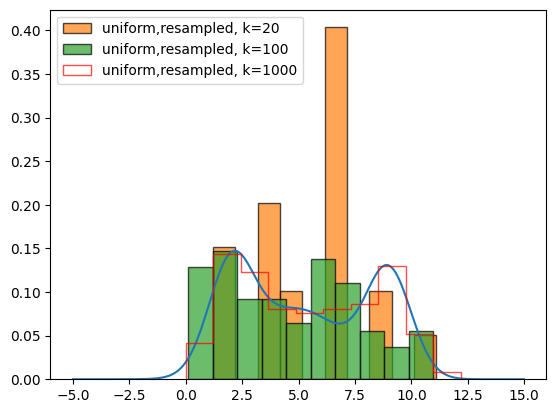

In [307]:
x = np.arange(-5,15,0.01)
y = [p(idx) for idx in x]
plt.plot(x, y)

rng = np.random.default_rng(0)

nx = np.arange(-5,15,0.01)
ny = [normal_dist(idx, *NORMAL_PARAMS) for idx in nx]

# plt.plot(nx,ny)

def uni_q(x):
    return 1/15 if x >= 0 and x <= 15 else 0

for edgecolor, alpha, histtype, k in zip(("black","black","red"),(1,0.7,1, 1), ("bar","bar","step", "step"),(20,100,1000,)):
    samples = gen_uniform_samples(k=k, seed=int(datetime.now().timestamp()))
    resampled = resample(samples, k=k, p_func=p,q_func=uni_q)

    plt.hist(resampled, density=True, label=f"uniform,resampled, k={k}", histtype=histtype, edgecolor=edgecolor, alpha=0.7)


plt.legend()
plt.show()


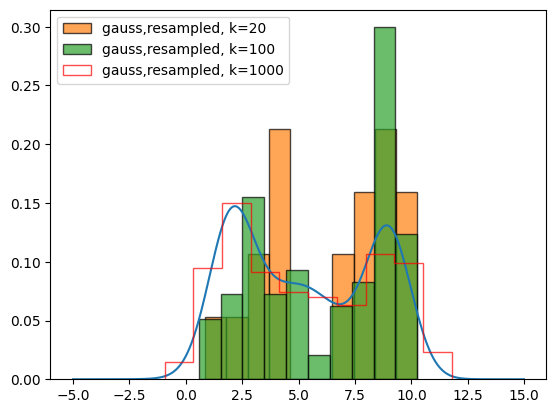

In [306]:
x = np.arange(-5,15,0.01)
y = [p(idx) for idx in x]
plt.plot(x, y)

rng = np.random.default_rng(0)

nx = np.arange(-5,15,0.01)
ny = [normal_dist(idx, *NORMAL_PARAMS) for idx in nx]

# plt.plot(nx,ny)

def uni_q(x):
    return 1/15 if x >= 0 and x <= 15 else 0

for edgecolor, alpha, histtype, k in zip(("black","black","red"),(1,0.7,1, 1), ("bar","bar","step", "step"),(20,100,1000,)):
    samples = gen_normal_samples(k=k, seed=int(datetime.now().timestamp()))
    resampled = resample(samples, k=k)


    plt.hist(resampled, density=True, label=f"gauss,resampled, k={k}", histtype=histtype, edgecolor=edgecolor, alpha=0.7)
plt.legend()
plt.show()


The red line for k = 1000, fits the best. Keeping the height of the peaks for `p` and the resampled one.

The green for k = 100 shows that the resampled density is located somewhat at the peaks for `p`.

The yellow for k = 20, shows somewhat the same as k = 1000, but understandably since `q` has its mean to be 5, it makes sense that the resampled samples for small k will tend to go a bit to the right with a tendency to be around 5.